In [39]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [40]:
train_dir = './train'
test_dir = './test'

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False  # No mezclar datos de prueba
)


Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │     1,204,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,298,746 (4.95 MB)

 Trainable params: 1,298,746 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# liberar memoria para amenizar el proceso de entrenamiento
# Liberar la memoria de la GPU
backend.clear_session()


In [46]:
# Calcular steps_per_epoch y validation_steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [50]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Configura correctamente
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps,  # Configura correctamente
    callbacks=[early_stopping]  # Usar EarlyStopping para evitar sobreajuste
)

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 217s 579ms/step - accuracy: 0.5857 - loss: 0.6611 - val_accuracy: 0.8049 - val_loss: 0.5221
Epoch 2/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.7500 - loss: 0.5231 - val_accuracy: 0.3750 - val_loss: 0.7522
Epoch 3/10


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


371/371 ━━━━━━━━━━━━━━━━━━━━ 219s 588ms/step - accuracy: 0.7548 - loss: 0.5292 - val_accuracy: 0.8150 - val_loss: 0.4733
Epoch 4/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.8438 - loss: 0.4505 - val_accuracy: 0.2500 - val_loss: 0.9696
Epoch 5/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 209s 563ms/step - accuracy: 0.8050 - loss: 0.4548 - val_accuracy: 0.7792 - val_loss: 0.4381
Epoch 6/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.8438 - loss: 0.4404 - val_accuracy: 0.7500 - val_loss: 0.4806
Epoch 7/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 192s 516ms/step - accuracy: 0.8261 - loss: 0.4145 - val_accuracy: 0.7732 - val_loss: 0.4777
Epoch 8/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - accuracy: 0.7500 - loss: 0.7184 - val_accuracy: 1.0000 - val_loss: 0.1849
Epoch 9/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 189s 508ms/step - accuracy: 0.8250 - loss: 0.4096 - val_accuracy: 0.8352 - val_loss: 0.3706
Epoch 10/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - accuracy: 0.8750 - loss: 0.4122 - va

In [51]:
# Guardar el modelo completo
model.save('models/24_cnn.h5')

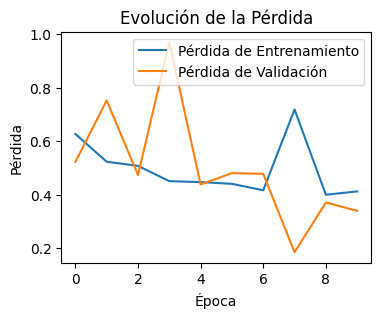

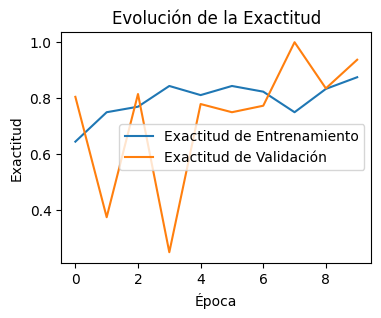

In [52]:
# Graficar la pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [53]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.6016 - loss: 0.7007
Pérdida: 0.503632664680481
Exactitud: 0.7544999718666077
